In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from torchvision import datasets

In [ ]:
np.random.seed(0)
n = 10
s = 100
K = 10
beta = 0.0

X = np.random.randn(s, n)
W_true = np.random.randn(n, K)

y = X @ W_true + beta * np.random.randn(s, K)

In [79]:
W = np.linalg.inv(X.T @ X) @ X.T @ y

In [80]:
((W - W_true) ** 2).mean()

1.584059323665273e-31

In [ ]:
betas = np.linspace(0, 10, 1000)
errors = []
for beta in betas:
    y = X @ W_true + beta * np.random.randn(s, n)
    W = np.linalg.inv(X.T @ X) @ X.T @ y
    errors.append(((W - W_true) ** 2).mean())

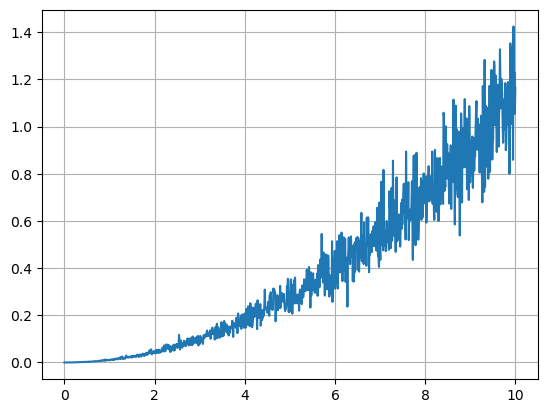

In [84]:
plt.plot(betas, errors)
plt.grid()

In [86]:
V, d, U = np.linalg.svd(X, full_matrices=False)
D = np.eye(len(d)) * d
lambd = d**2

In [87]:
np.max(lambd) / np.min(lambd)

2.4334912629980634

In [114]:
MNIST_train = datasets.MNIST("./Datasets", train=True, download=True)
X_train = MNIST_train.data.view([-1, 784]).numpy()
Y_train = MNIST_train.targets.numpy()

MNIST_test = datasets.MNIST("./Datasets", train=False, download=True)
X_test = MNIST_test.data.view([-1, 784]).numpy()
Y_test = MNIST_test.targets.numpy()

In [122]:
pca = PCA(20)
X_train_low = pca.fit_transform(X_train)
X_test_low = pca.fit_transform(X_test)

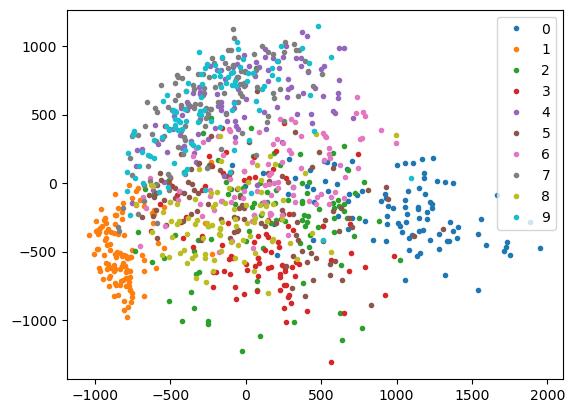

In [123]:
for k in np.unique(Y_train):
    idx = np.where(Y_train[:1000] == k)[0]
    plt.plot(X_train_low[idx, 0], X_train_low[idx, 1], ".", label=str(k))
plt.legend(loc="best")